# Demoprogramm: Zentraler Grenzwertsatz (ZGW)
Der Zentrale Grenzwertsatz besagt, dass die Summe von Werten einer unabhängigen Zufallsvariablen mit derselben Verteilung (sog. IIDs: Independent and Identically Distributed) normalverteilt sind, wenn sehr viele ("unendlich viele") Stichproben gezogen werden. Dabei spielt es keine Rolle, welcher Verteilung die Population/Stichprobe unterliegt (also ob z.B. gleichverteilt, normalverteilt, poisson-verteilt oder irgendeine andere Verteilung).

In diesem Demoprogramm simulieren wir einen Würfel (Zahlen 1..6). Die Wahrscheinlichkeit für Augenzahlen bei einem (fairen) Würfel sind eigentlich gleichverteilt: $P(X=1) = P(X=2) = ... = P(X=6) = \frac{1}{6}$

Würfeln wir N mal (im Beispiel 15 mal) und bilden aus den gewürfelten Augenzahlen den Mittelwert(der über die Summe der Augenzahlen gebildet wird) und wiederholen dies r mal (im Beispiel 500 mal) und stellen diese Mittelwerte als Histogramm dar, so erkennen wir bereits eine Normalverteilung.

Im Beispiel weisen wir jeder Augenzahl eine beliebige Wahrscheinlichkeit zu - die Mittelwerte sind dennoch normalverteilt!


In [31]:
wuerfel = [1,2,3,4,5,6]


In [32]:
p = [.1, .1, .4, .2, .1, .1]
N = 15 # Jeweils 5 mal wuerfeln
r = 500 # Versuch jeweils r mal wiederholen und den Mittelwert bilden


In [33]:
# Würfle N mal, bilde den Mittelwert und wiederhole dies r mal
means = [np.random.choice(wuerfel, size=N, replace=True, p=p).mean() for _ in range(0,r)]


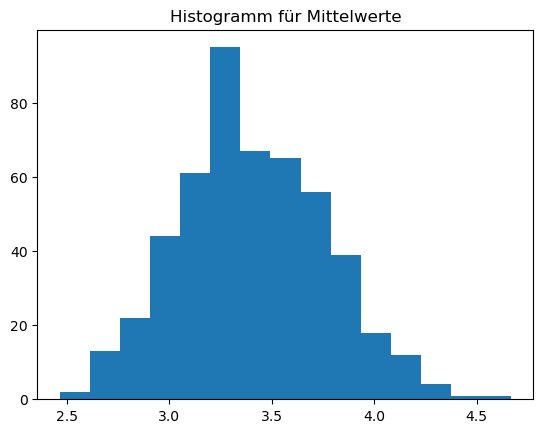

In [34]:
# Plotte Histogramm mit den Mittelwerten
import matplotlib.pyplot as plt
plt.hist(means, bins=15)
plt.title("Histogramm für Mittelwerte")
plt.show()

In [35]:
# Test auf Normalverteilung
# Diese Tests funktionnieren eher mit kleinen Stichprobengrößen!

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy import stats
#Shapiro-Wilk-Test

stats, p = shapiro(means)
print("p-Wert für Shapiro-Wilk: " + str(p))
print("Vermutlich normalverteilt" if p > 0.05 else "Vermutlich nicht normalverteilt")
# Kolmogorov-Smirnov
means = (means-np.mean(means))/np.std(means)
stats, p = kstest(means, "norm")
print("p-Wert für Kolmogorov-Smirnov: " + str(p))
print("Vermutlich normalverteilt" if p > 0.05 else "Vermutlich nicht normalverteilt")



p-Wert für Shapiro-Wilk: 0.0034528051037341356
Vermutlich nicht normalverteilt
p-Wert für Kolmogorov-Smirnov: 0.01500743199580513
Vermutlich nicht normalverteilt


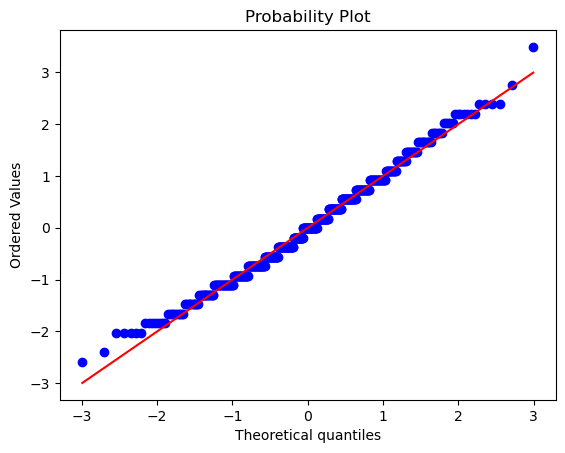

In [36]:
# Q-Q-Plot
import scipy.stats as stats
import pylab
stats.probplot(means, dist="norm", plot=pylab)
pylab.show()